In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import scipy.integrate as integrate
import mpmath as mp

In [9]:
## Random number Generate and save as file
def Random_number(N = 25,num = 500000):
    output = np.zeros(num)
    for i in range(num):
        output[i] = np.random.randint(N)
    output2 = np.zeros(num)
    for i in range(num):
        output2[i] = np.random.rand()

    pd.DataFrame(output).to_csv('RandInt'+str(N)+'_'+str(num)+'.csv')
    pd.DataFrame(output2).to_csv('RandDoub_'+str(num)+'.csv')

# Random_number()

In [4]:
def C(T,J=1):
    b = 1/T #beta
    k = 2*np.sinh(2*b*J)/(np.cosh(2*b*J)**2)   #kappa
    K1, _ = integrate.quad(lambda x: 1/np.sqrt(1-k**2*np.sin(x)**2),0,np.pi/2)
    E1, _ = integrate.quad(lambda x: np.sqrt(1-k**2*np.sin(x)**2),0,np.pi/2)
    tanh = np.tanh(2*b*J)
    return 4/np.pi*((b*J/tanh)**2)*(K1-E1-(1-tanh**2)*(np.pi/2+(2*tanh**2-1)*K1)) # boltzman k = 1

def C2(T,J=1):
    b = 1/T
    Tc = 2/np.log(1+np.sqrt(2))
    return -2/np.pi*(2*J*b)**2*np.log(np.abs(1-T/Tc))   

def C3(T,J=1):
    b = 1/T #beta
    k = 2*np.sinh(2*b*J)/(np.cosh(2*b*J)**2)   #kappa
    mp.mp.dps = 50
    K1 = mp.quad(lambda x: 1/mp.sqrt(1-k**2*mp.sin(x)**2),[0,mp.pi/2])
    E1 = mp.quad(lambda x: mp.sqrt(1-k**2*mp.sin(x)**2),[0,mp.pi/2])
    tanh = np.tanh(2*b*J)
    return 4/np.pi*((b*J/tanh)**2)*(K1-E1-(1-tanh**2)*(np.pi/2+(2*tanh**2-1)*K1)) # boltzman k = 1

_Ebin = 100
ExactT = np.zeros(_Ebin)
Exactm = np.zeros_like(ExactT)

Critical_Temp = 2/np.log(1+np.sqrt(2))

for i in range(len(Exactm)):
    ExactT[i] = (Critical_Temp-0.01)/_Ebin*(i+1)
    Exactm[i] = (1-np.sinh(2*(1/ExactT[i]))**-4)**(1/8)

ExactT = np.append(ExactT,Critical_Temp)
Exactm = np.append(Exactm,0)

_Ebin2 = 200
ExactT2 = np.zeros(_Ebin2)
ExactC = np.zeros_like(ExactT2)

for i in range(len(ExactC)):
    ExactT2[i] = 5/_Ebin2*(i+1)
    ExactC[i] = C(ExactT2[i]) 


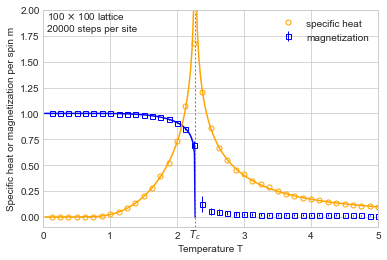

In [205]:
a = pd.read_csv("../C++/Result/Sample.csv")
T2 = a.iloc[:,1].values
M2 = a.iloc[:,2].values
C2 = a.iloc[:,3].values
M2error = np.sqrt(1/(18000-1)*abs(a.iloc[:,5].values/10000-(a.iloc[:,4].values/100)**2))

plt.style.use('seaborn-whitegrid')
plt.rcParams['text.usetex'] = False

plt.ylim(-0.1,2)
plt.xlim(0,5)
plt.errorbar(T2,M2,yerr=M2error, lw=1, linestyle='', marker='s', markersize=5, color='b', label='magnetization',mfc='none')
plt.plot(T2,C2,linestyle='', marker='o', markersize=5, color='orange', label='specific heat',mfc='none')
plt.plot(ExactT,Exactm, color='b')
plt.plot(ExactT2,ExactC, color='orange')


plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
plt.legend()
plt.text(0.05,1.91,"100 $\\times$ 100 lattice")
plt.text(0.05,1.79,"20000 steps per site")
plt.text(2.27, -0.2, '$T_c$', ha='center')


plt.ylabel('Specific heat or magnetization per spin m')
plt.xlabel('Temperature T')
plt.show()

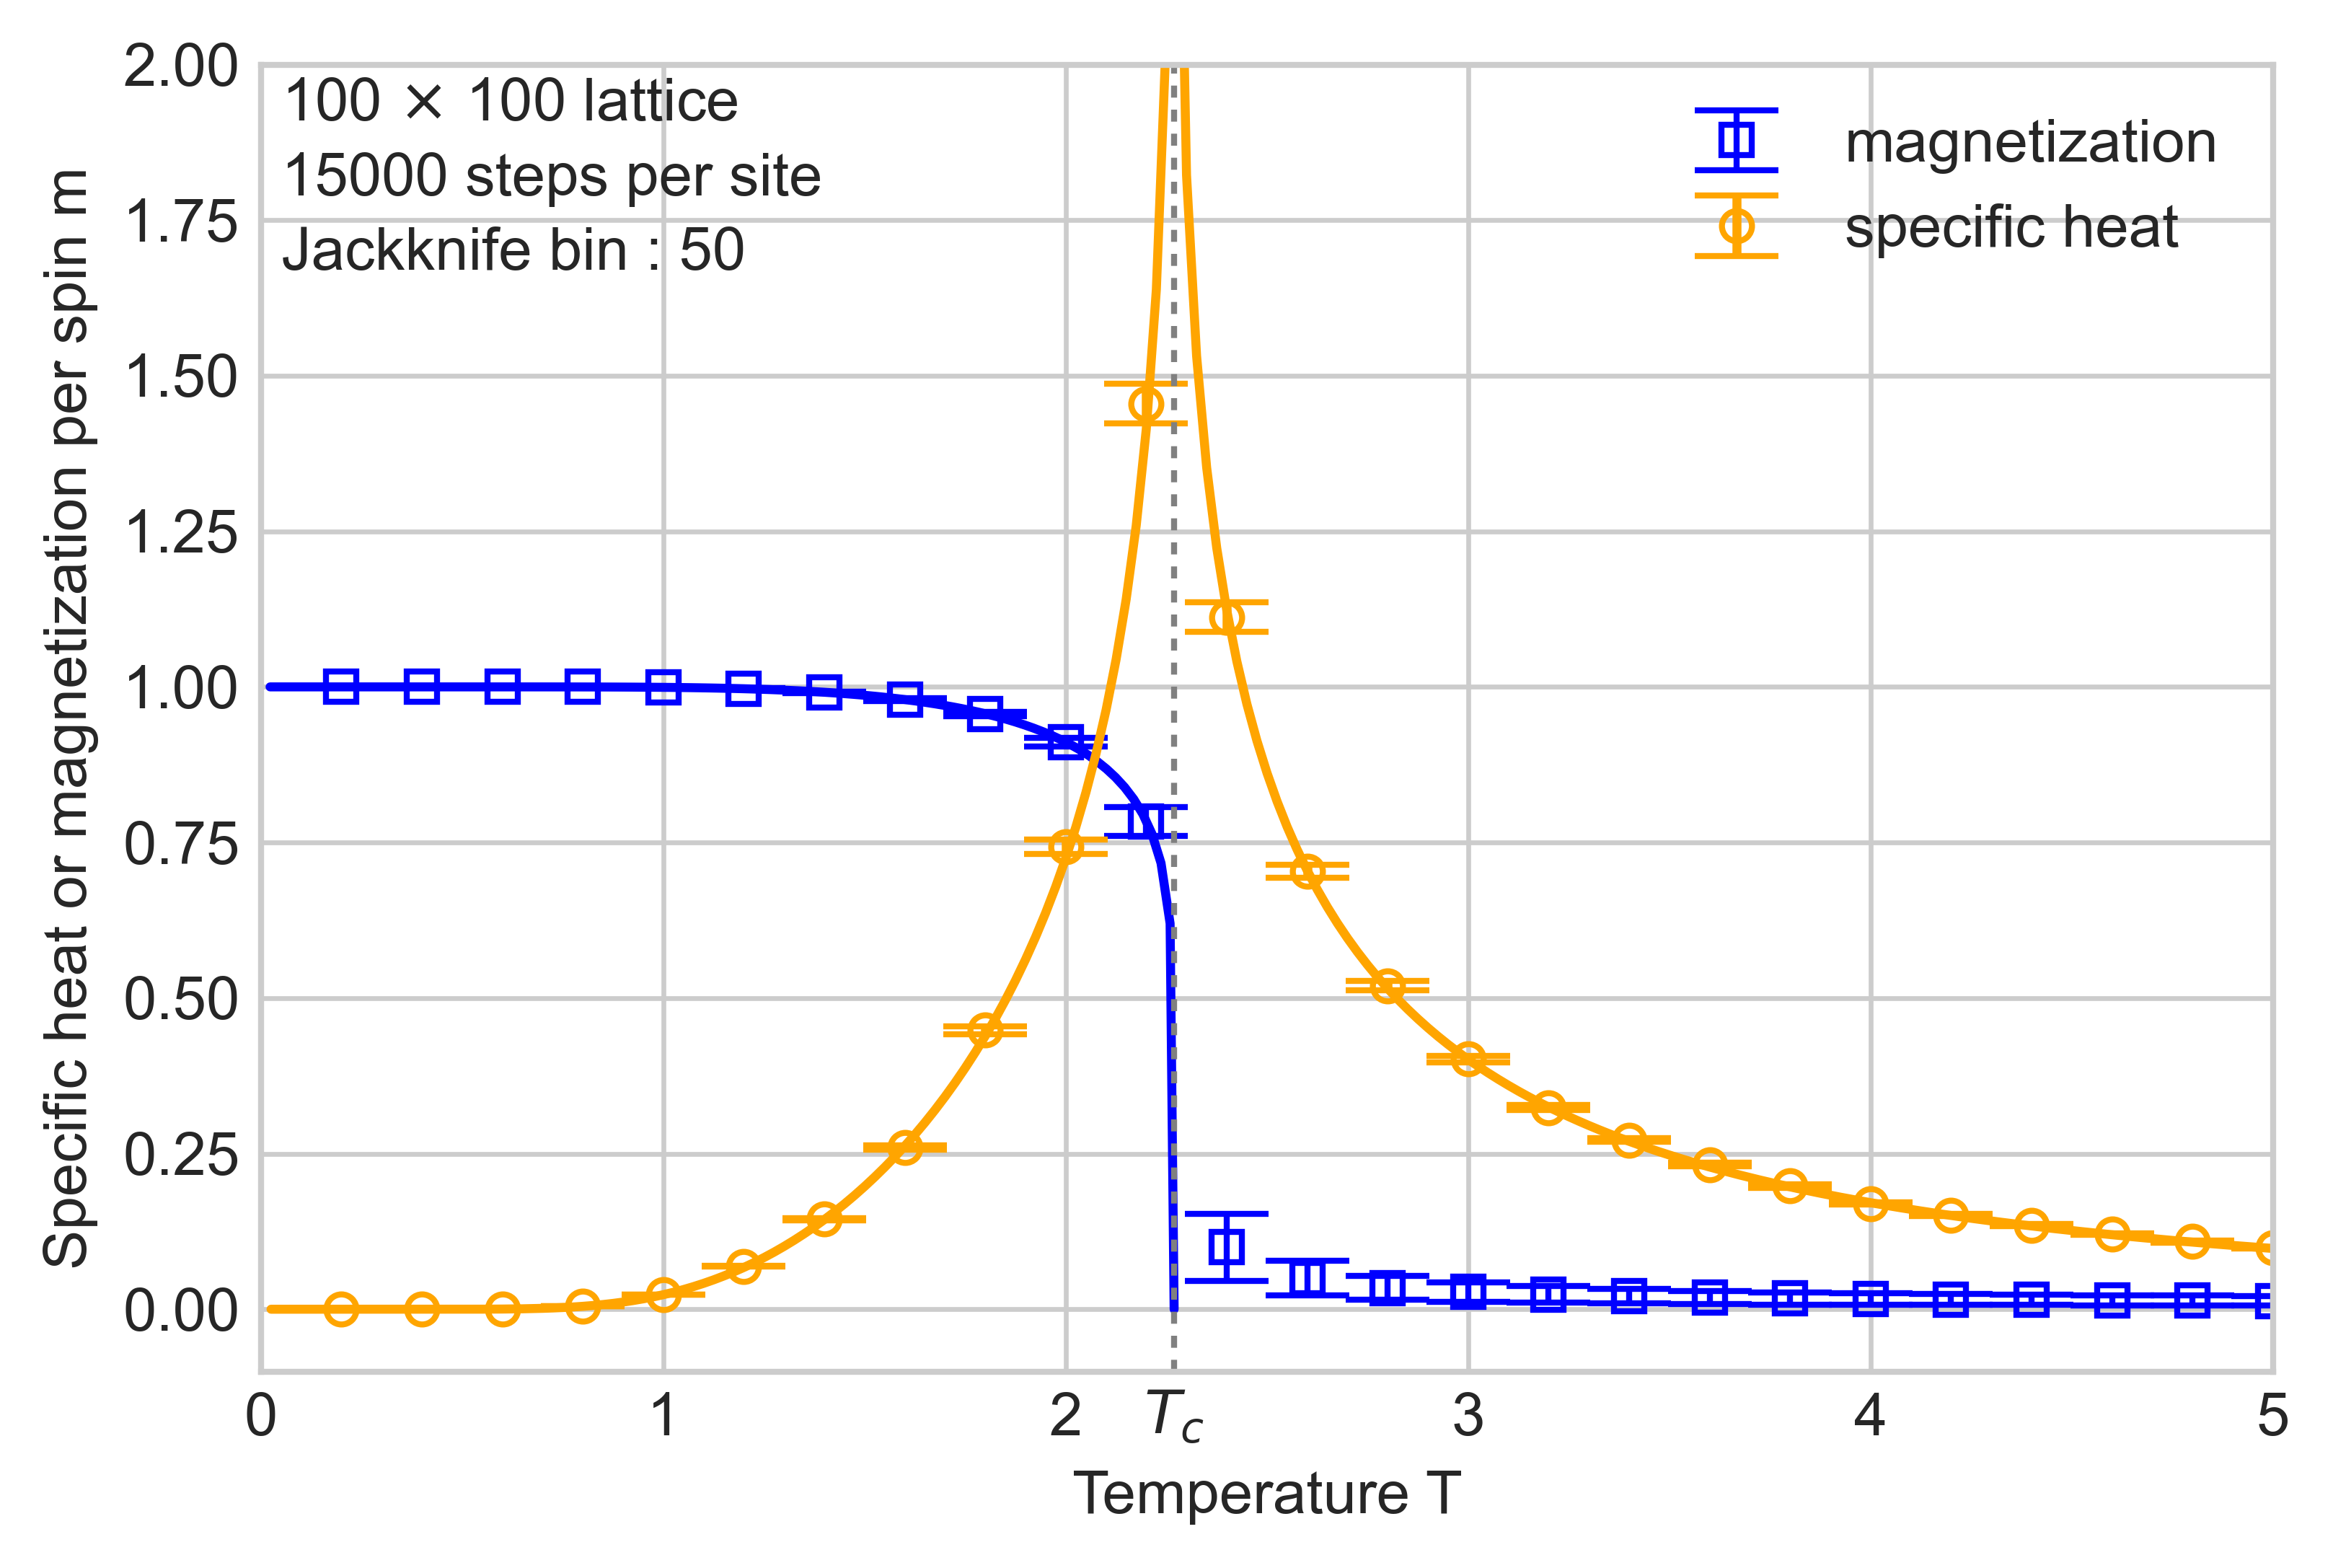

In [26]:
a = pd.read_csv("../C++/Result/Error/Metropolis_c_100_int25_14.csv")
T2 = a.iloc[:,1].values
M2 = a.iloc[:,2].values
C2 = a.iloc[:,3].values
C2error = a.iloc[:,9].values
M2error = np.sqrt(1/(18000-1)*abs(a.iloc[:,5].values/10000-(a.iloc[:,4].values/100)**2))

plt.style.use('seaborn-whitegrid')
plt.figure(dpi=600)


plt.ylim(-0.1,2)
plt.xlim(0,5)
plt.errorbar(T2,M2,yerr=M2error, lw=1, linestyle='', marker='s', markersize=5,capsize=7, color='b', label='magnetization',mfc='none')
# plt.plot(T2,C2,linestyle='', marker='o', markersize=5, color='orange', label='specific heat',mfc='none')
plt.errorbar(T2,C2,yerr=C2error,linestyle='', marker='o', markersize=5,capsize=7, color='orange' ,label='specific heat',mfc='none')
plt.plot(ExactT,Exactm, color='b')
plt.plot(ExactT2,ExactC, color='orange')


plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
plt.legend()
plt.text(0.05,1.91,"100 $\\times$ 100 lattice")
plt.text(0.05,1.79,"15000 steps per site")
plt.text(0.05,1.67,"Jackknife bin : 50")
plt.text(2.27, -0.2, '$T_c$', ha='center')


plt.ylabel('Specific heat or magnetization per spin m')
plt.xlabel('Temperature T')
plt.show()

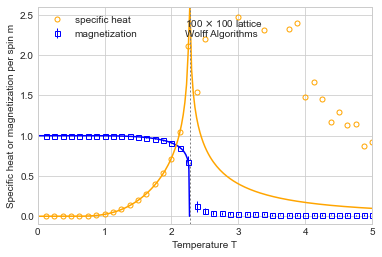

In [237]:
a = pd.read_csv("../C++/Result/Wolff_c_100_int40_2.csv")
T2 = a.iloc[:,1].values
M2 = a.iloc[:,2].values
C2 = a.iloc[:,3].values
M2error = np.sqrt(1/(18000-1)*abs(a.iloc[:,5].values/10000-(a.iloc[:,4].values/100)**2))

plt.style.use('seaborn-whitegrid')
plt.rcParams['text.usetex'] = False

plt.ylim(-0.1,2.6)
plt.xlim(0,5)
plt.errorbar(T2,M2,yerr=M2error, lw=1, linestyle='', marker='s', markersize=5, color='b', label='magnetization',mfc='none')
plt.plot(T2,C2,linestyle='', marker='o', markersize=5, color='orange', label='specific heat',mfc='none')
plt.plot(ExactT,Exactm, color='b')
plt.plot(ExactT2,ExactC, color='orange')


plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
plt.legend()
plt.text(2.202,2.35,"100 $\\times$ 100 lattice")
plt.text(2.203,2.23,"Wolff Algorithms")
# plt.text(0.05,1.79,"20000 steps per site")
# plt.text(2.27, -0.2, '$T_c$', ha='center')


plt.ylabel('Specific heat or magnetization per spin m')
plt.xlabel('Temperature T')
plt.show()

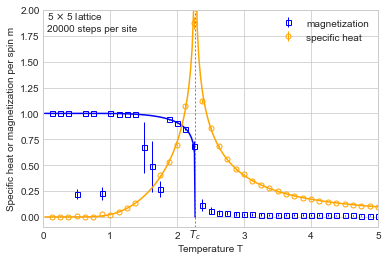

In [188]:
a = pd.read_csv("../C++/Result/Metropolis_c_100_int40_1.csv")
T2 = a.iloc[:,1].values
M2 = a.iloc[:,2].values
C2 = a.iloc[:,3].values
M2error = np.sqrt(1/(20000)*abs(a.iloc[:,5].values/10000-(a.iloc[:,4].values/100)**2))
C2error = a.iloc[:,9].values

plt.style.use('seaborn-whitegrid')

plt.ylim(-0.1,2)
plt.xlim(0,5)
plt.errorbar(T2,M2,yerr=M2error, lw=1, linestyle='', marker='s', markersize=5, color='b', label='magnetization',mfc='none')
plt.errorbar(T2,C2,yerr=C2error, lw=1,linestyle='', marker='o', markersize=5, color='orange', label='specific heat', mfc='none')
plt.plot(ExactT,Exactm, color='b')
plt.plot(ExactT2,ExactC, color='orange')

plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
plt.legend()
plt.text(0.05,1.91,"5 $\\times$ 5 lattice")
plt.text(0.05,1.79,"20000 steps per site")
plt.text(2.27, -0.2, '$T_c$', ha='center')

plt.ylabel('Specific heat or magnetization per spin m')
plt.xlabel('Temperature T')
plt.show()

(-0.1, 1.0)

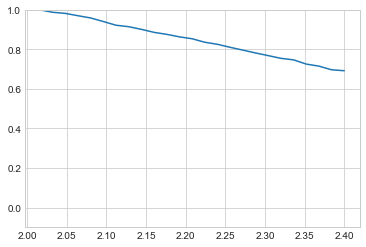

In [148]:
lat_size = a.iloc[:,8].values
plt.style.use('seaborn-whitegrid')
plt.plot(T2,lat_size/max(lat_size))
plt.ylim(-0.1,1)

In [127]:
Merror = np.sqrt(1/(18000-1)*abs(a.iloc[:,5].values/10000-(a.iloc[:,4].values/100)**2))
Merror

array([4.53384189e-07, 4.53384189e-07, 4.53384189e-07, 3.36860302e-06,
       2.59801280e-05, 7.30765067e-05, 1.61982524e-04, 2.98699767e-04,
       4.78846715e-04, 7.42169110e-04, 1.07817314e-03, 1.50389705e-03,
       2.09146483e-03, 2.92261752e-03, 4.15729168e-03, 6.58373175e-03,
       1.63664923e-02, 3.84328129e-02, 7.69305470e-02, 3.04441134e-02,
       2.64140385e-02, 1.98239127e-02, 1.74707158e-02, 1.48068023e-02,
       1.38107134e-02, 1.27539642e-02, 1.17285825e-02, 1.11081934e-02,
       1.05680235e-02, 9.89998332e-03, 9.51637581e-03, 9.39641766e-03,
       8.96897633e-03, 8.72133501e-03, 8.60393545e-03, 8.28127893e-03,
       8.03640007e-03, 7.97855875e-03, 7.78998789e-03, 7.51684202e-03])

In [28]:
b = pd.read_csv("Metropolis_python.csv")
T3 = b.iloc[:,1].values
M3 = b.iloc[:,2].values
C3 = b.iloc[:,3].values

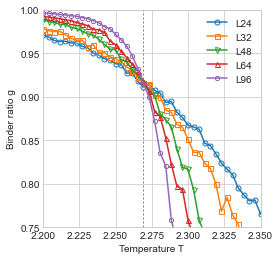

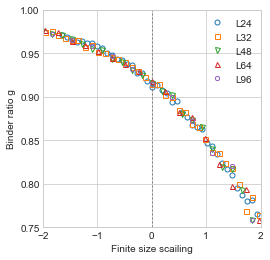

In [170]:
L24 = pd.read_csv("../C++/Result/Binder/Wolff_c_24_int40_1.csv")
L32 = pd.read_csv("../C++/Result/Binder/Wolff_c_32_int40_1.csv")
L48 = pd.read_csv("../C++/Result/Binder/Wolff_c_48_int40_1.csv")
L64 = pd.read_csv("../C++/Result/Binder/Wolff_c_64_int40_1.csv")
L96 = pd.read_csv("../C++/Result/Binder/Wolff_c_96_int40_1.csv")
Llist = [L24,L32,L48,L64,L96]
# Llist = [L24,L32,L48]
Lname = ["L24","L32","L48","L64","L96"]
Lsize = [24,32,48,64,96]
Llen = 5
marker = ["o","s","v","^","8"]
T2 = L24.iloc[:,1].values
Binder = [0.5*(3-i.iloc[:,6].values/(i.iloc[:,5].values)**2) for i in Llist]

plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ylim(0.75,1)
plt.xlim(2.2,2.35)
for i in range(Llen):
    plt.plot(T2,Binder[i],marker=marker[i],markersize=5,mfc='none',label=Lname[i])
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

plt.legend()
plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
plt.ylabel('Binder ratio g')
plt.xlabel('Temperature T')
# plt.text(2.265,0.748, '$T_c$')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ylim(0.75,1)
plt.xlim(-2,2)
T22 = T2-2/np.log(1+np.sqrt(2))
for i in range(Llen):
    plt.plot(T22*Lsize[i],Binder[i],linestyle="",marker=marker[i],markersize=5,mfc='none',label=Lname[i])
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.legend()
plt.axvline(x=0,c='grey',lw=1,dashes=[2,2])
plt.ylabel('Binder ratio g')
plt.xlabel('Finite size scailing')
# plt.xlabel('$L^{1/\nu}[T-T_c]$')
plt.show()

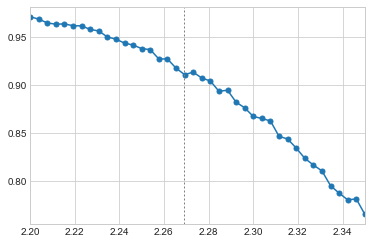

In [95]:
L5 = pd.read_csv("../C++/Result/Wolff_c_24_int40_3.csv")
# L5 = pd.read_csv("../C++/Result/Exact_c_5_int40_1.csv")
Llist = [L5]
T2 = L5.iloc[:,1].values
Binder = [0.5*(3-i.iloc[:,6].values/(i.iloc[:,5].values)**2) for i in Llist]
plt.style.use('seaborn-whitegrid')

# plt.ylim(-0.1,2)
plt.xlim(2.2,2.35)
marker = ["o","s","o","s","o"]
for i in range(1):
    plt.plot(T2,Binder[i],marker=marker[i],markersize=5)

plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])

plt.show()

In [ ]:
L5 = pd.read_csv("../C++/Result/Exact_c_5_int25_1.csv")
Llist = [L5]
T2 = L5.iloc[:,1].values
Binder = [0.5*(3-i.iloc[:,6].values/(i.iloc[:,5].values)**2) for i in Llist]
plt.style.use('seaborn-whitegrid')

# plt.ylim(-0.1,2)
# plt.xlim(2.2,2.35)
marker = ["o","s","o","s","o"]
for i in range(1):
    plt.plot(T2,Binder[i],marker=marker[i],markersize=5)
plt.show()